# Correlation between MBTI & Zodiac signs

**Author: Jolene (INTP)**

# Introduction
Hey there, awesome people! 👋

Have you ever wondered if your zodiac sign might have something to do with your MBTI type? For example, if you're a passionate Leo🦁️ or a shrewd Scorpio🦂️, does that influence your MBTI type? Well, that's exactly what we're about to explore.

We've got a super cool dataset filled with two things: MBTI types and zodiac sign. If you've ever encountered MBTI, you know it categorizes personality traits into four dimensions -— Extraversion/Introversion, Sensing/Intuition, Thinking/Feeling, and Judging/Perceiving. These are the elements that shape our personalities.

With this data, we'll dive deep into the relationship between zodiac signs and MBTI, looking for interesting patterns or correlations. Are most INFJs born under a specific sign? Are summer babies more outgoing and passionate or emotionally intense? Or do certain types appear more often in different years?

But just a heads-up, we're here to enjoy the process, not to conduct serious scientific research. Remember, correlation doesn't equal causation. However, who doesn't love uncovering a fun mystery?

So, grab your detective hats and let's embark on this journey where astrology and MBTI types collide! 🎉🔥

# Import package and dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt
from scipy import stats

The data was collected in the following format: 

1. Timestamp that the form was filled in the format mm/dd/yyyy H:M:S

2. Birthdate in the format mm/dd/yyyy

3. Time of Birth

4. 4-letter MBTI type

In [3]:
data = pd.read_csv('/kaggle/input/mbti-and-birthdays/MBTI types and Birthdays (Responses).csv')
data.shape
data.head()

,Timestamp,Birthday,Time of Birth (not required),MBTI Type
0,4/12/2020 17:39:37,9/13/1996,NaN,INFJ
1,4/12/2020 17:45:59,3/8/2000,NaN,ISTJ
2,4/12/2020 17:58:56,8/20/2000,NaN,INTP
3,4/12/2020 18:10:25,6/30/2000,NaN,INFP
4,4/12/2020 18:10:27,6/30/2000,NaN,INFP


Drop `Time of Birth (not required)` because it is not required in the following analysis.

In [4]:
data = data.drop('Time of Birth (not required)', axis = 1)

## Zodiac Sign

Use birthday to define `Zodiac sign`.

In [5]:
def get_zodiac_sign(date):
    day = date.day
    month = date.month_name()
    if month == 'December':
        astro_sign = 'Sagittarius' if (day < 22) else 'Capricorn'
    elif month == 'January':
        astro_sign = 'Capricorn' if (day < 20) else 'Aquarius'
    elif month == 'February':
        astro_sign = 'Aquarius' if (day < 19) else 'Pisces'
    elif month == 'March':
        astro_sign = 'Pisces' if (day < 21) else 'Aries'
    elif month == 'April':
        astro_sign = 'Aries' if (day < 20) else 'Taurus'
    elif month == 'May':
        astro_sign = 'Taurus' if (day < 21) else 'Gemini'
    elif month == 'June':
        astro_sign = 'Gemini' if (day < 21) else 'Cancer'
    elif month == 'July':
        astro_sign = 'Cancer' if (day < 23) else 'Leo'
    elif month == 'August':
        astro_sign = 'Leo' if (day < 23) else 'Virgo'
    elif month == 'September':
        astro_sign = 'Virgo' if (day < 23) else 'Libra'
    elif month == 'October':
        astro_sign = 'Libra' if (day < 23) else 'Scorpio'
    elif month == 'November':
        astro_sign = 'Scorpio' if (day < 22) else 'Sagittarius'
    else:
        astro_sign = None
    return astro_sign

In order to facilitate subsequent tests, a new category variable `Zodiac category` is added to represent the number (month) of the constellation.

In [6]:
def get_zodiac_sign_categorical(astro_sign):
    if astro_sign == 'Capricorn':
        cate = 1
    elif astro_sign == 'Aquarius':
        cate = 2
    elif astro_sign == 'Pisces':
        cate = 3
    elif astro_sign == 'Aries':
        cate = 4
    elif astro_sign == 'Taurus':
        cate = 5
    elif astro_sign == 'Gemini':
        cate = 6
    elif astro_sign == 'Cancer':
        cate = 7
    elif astro_sign == 'Leo':
        cate = 8
    elif astro_sign == 'Virgo':
        cate = 9
    elif astro_sign == 'Libra':
        cate = 10
    elif astro_sign == 'Scorpio':
        cate = 11 
    elif astro_sign == 'Sagittarius':
        cate = 12
    else: cate = 0
    return cate

Convert `Birthday` and `Timestamp` to date format.

In [7]:
data['Birthday'] = pd.to_datetime(data['Birthday'], infer_datetime_format = True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], infer_datetime_format = True)

/tmp/ipykernel_33/2175117336.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Birthday'] = pd.to_datetime(data['Birthday'], infer_datetime_format = True)
/tmp/ipykernel_33/2175117336.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], infer_datetime_format = True)


In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format = '%d%m%Y %H:%M:%S')
data['Birthday'] = pd.to_datetime(data['Birthday'], format = '%d%m%Y')
data['Zodiac Sign'] = data.iloc[:, 1].apply(lambda X: get_zodiac_sign(X))

In [9]:
data['Zodiac category'] = data['Zodiac Sign'].apply(get_zodiac_sign_categorical)

In [10]:
data.head()

,Timestamp,Birthday,MBTI Type,Zodiac Sign,Zodiac category
0,2020-04-12 17:39:37,1996-09-13,INFJ,Virgo,9
1,2020-04-12 17:45:59,2000-03-08,ISTJ,Pisces,3
2,2020-04-12 17:58:56,2000-08-20,INTP,Leo,8
3,2020-04-12 18:10:25,2000-06-30,INFP,Cancer,7
4,2020-04-12 18:10:27,2000-06-30,INFP,Cancer,7


---------

# Zodiac Sign & MBTI Type

## Distribution of zodiac sign

The proportions of different Zodiac who filled the form is shown below. We can see the distribution is fairly balanced.

The majority of people who participated in the survey were **Taurus**, and **Libra** had the fewest participants.


In [11]:
zodiac_counts = data['Zodiac Sign'].value_counts()
zodiac_counts

Zodiac Sign
Taurus         32
Cancer         31
Pisces         28
Capricorn      28
Virgo          27
Leo            26
Aquarius       26
Sagittarius    26
Aries          24
Scorpio        20
Gemini         19
Libra          19
Name: count, dtype: int64

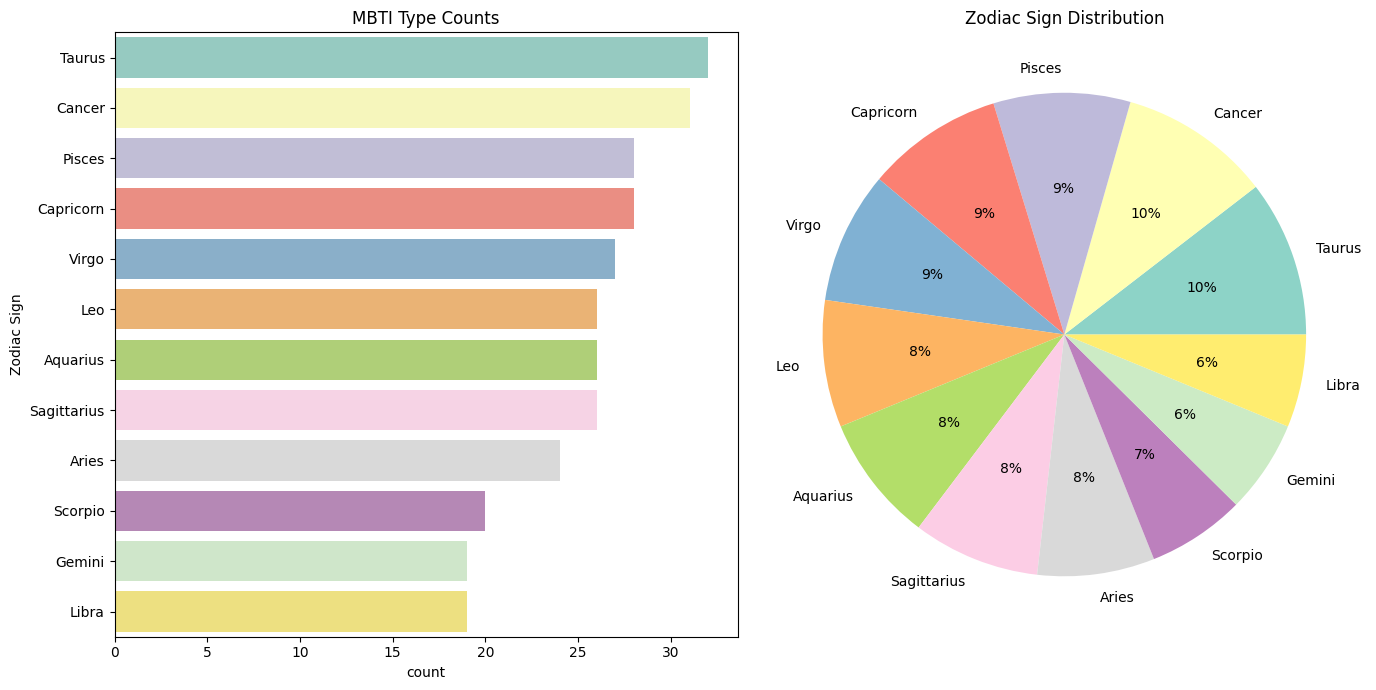

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.barplot(x=zodiac_counts, y=zodiac_counts.index, ax=axes[0], palette = 'Set3')
axes[0].set_title('MBTI Type Counts')

colors = sns.color_palette('Set3')[0:len(zodiac_counts)]
axes[1].pie(zodiac_counts, labels=zodiac_counts.index, colors=colors, autopct='%.0f%%')
axes[1].set_title('Zodiac Sign Distribution')

plt.tight_layout()
plt.show()

##  Distribution of MBTI types

The proportions of different MBTI types who filled the form is shown below. We can see that the distribution is very unbalanced.

The majority of people who participated in the survey were INFP, and ESFJ had the fewest participants. Interestingly, the two MBTI types are completely opposite!

According to legend, people with IN- personality types enjoy taking the MBTI test the most, with INFPs being particularly fond of it (and they are also the most common personality type in this dataset). Interestingly, INFPs are among the rarest personality types in the world. Isn't that fascinating?

In [13]:
mbti_counts = data['MBTI Type'].value_counts()
mbti_counts

MBTI Type
INFP    72
INTJ    59
INTP    49
INFJ    31
ENTP    20
ENFP    18
ISTJ    12
ISTP    10
ISFJ     8
ENFJ     7
ISFP     5
ENTJ     5
ESTP     3
ESFP     3
ESTJ     2
ESFJ     2
Name: count, dtype: int64

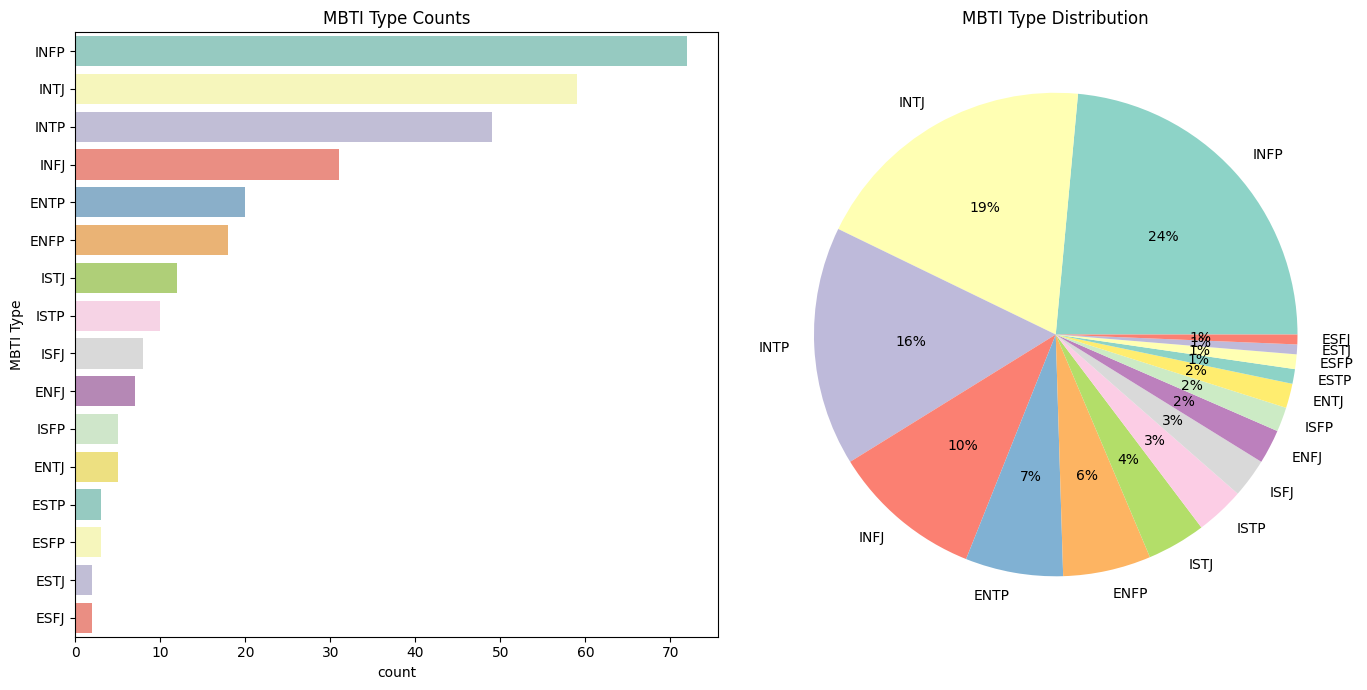

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.barplot(x=mbti_counts, y=mbti_counts.index, ax=axes[0], palette = 'Set3')
axes[0].set_title('MBTI Type Counts')

colors = sns.color_palette('Set3')[0:len(mbti_counts)]
axes[1].pie(mbti_counts, labels=mbti_counts.index, colors=colors, autopct='%.0f%%')
axes[1].set_title('MBTI Type Distribution')

plt.tight_layout()
plt.show()

## MBTI type v.s Zodiac Sign

Now that we have a general overview of the data, we can jump into more fun stuff.

In this segment, we're going to dive into whether the zodiac sign has anything to do with your MBTI type. It's like astrology meets psychology, but with a data-driven spin. So, are Aries folks more likely to be ENFJs? When will we see a flood of INFPs? Let's crunch the numbers and find out!

### Type Zodiac sign Distribution

Firstly, we can take a look at how each MBTI Type is distributed across the months of the year.

<Axes: xlabel='Zodiac category', ylabel='MBTI Type'>

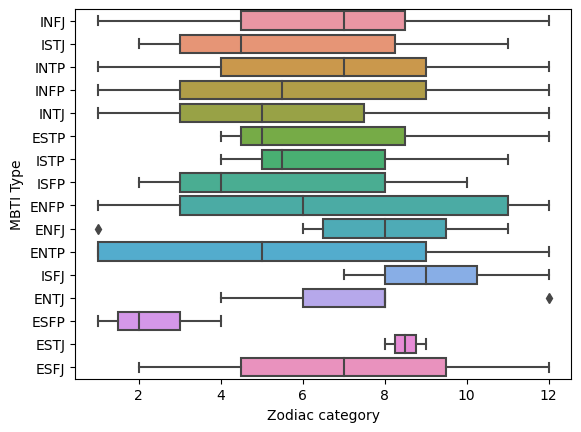

In [15]:
sns.boxplot(data = data, x = 'Zodiac category', y = 'MBTI Type')

Alright, let's deep dive into this boxplot we've got here. It's like a party where each MBTI type shows us when they typically land their birthday cake throughout the year. Keep in mind this is just a slice of the entire MBTI pie - it's the people who were groovy enough to fill out our form.

1. First off, for more than half of the MBTI types, their birthdays are evenly spread throughout the year, just like sprinkles on a doughnut - they start slow in January and ramp up all the way to December.

2. For our reliable ISTJs, introspective INFPs, ambitious INTJs, innovative ENTPs, and imaginative ENFPs, it looks like they couldn't wait to get into the world - the majority of them celebrated their first hello in the first half of the year (their median month is before June).

3. On the other hand, our deep INFJs, logical INTPs, warm ESFJs, dutiful ISFJs, proactive ENFJs, and natural leaders ESTJs took their sweet time to arrive - a big chunk of these folks started their journey in the latter half of the year (their median month is after June).

*Now, we have some interesting exceptions who aren't so evenly distributed across the year:*

1. **ISTPs**, our practical connoisseurs, mostly cluster in the warm months from May to August.

2. **ENFJs**, our benevolent leaders, hit their peak in November, with a few rare occurrences in January. It's like they collectively decided that November is the best time to show up!

3. **ENTJs** seem to enjoy the enthusiastic summer months - their median month is July, but they max out in October, covering the Cancer, Leo, and Virgo periods.

4. **ESFPs**, the life of the party, start making an entrance in January and keep up the momentum until April. Maybe they enjoy the spring sunshine and ease?

5. The serious and dedicated **ESTJs** have an interesting trend - their entire middle half (the IQR, if we're talking stats lingo) spans only from August to September, with no outliers.

6. **ESTPs**, the doers, are slightly skewed towards the latter half of the year, with their median month in May and extending until December.

7. Our ambitious **INTJs** have a curious pattern. Their main birthday cluster is between May and July - that's their entire IQR! This extends all the way to December.


### Counts of MBTI Types in each zodiac sign

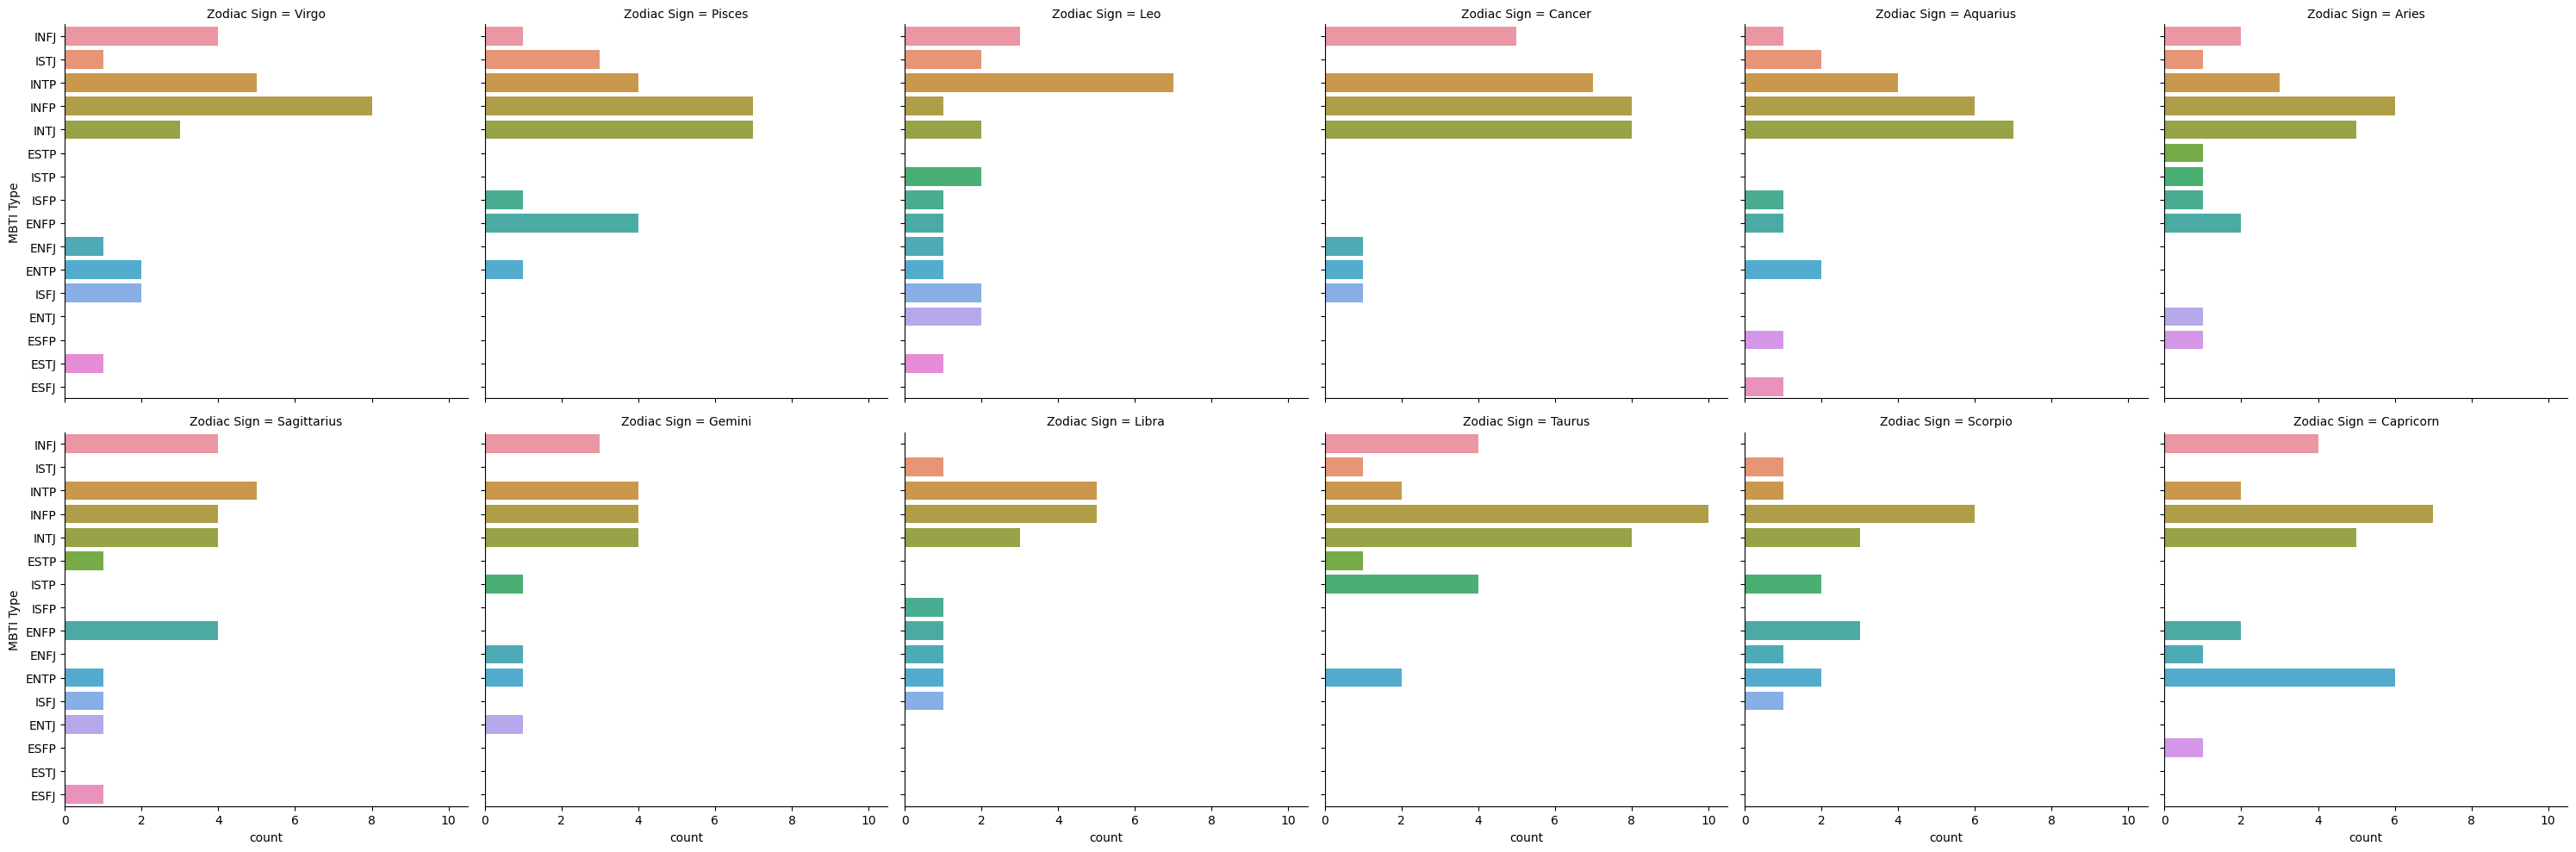

In [20]:
sns.catplot(y = 'MBTI Type', col = 'Zodiac Sign',
           data = data, kind = 'count',
           col_wrap = 6)

### Counts of Zodiac sign in each MBTI Types

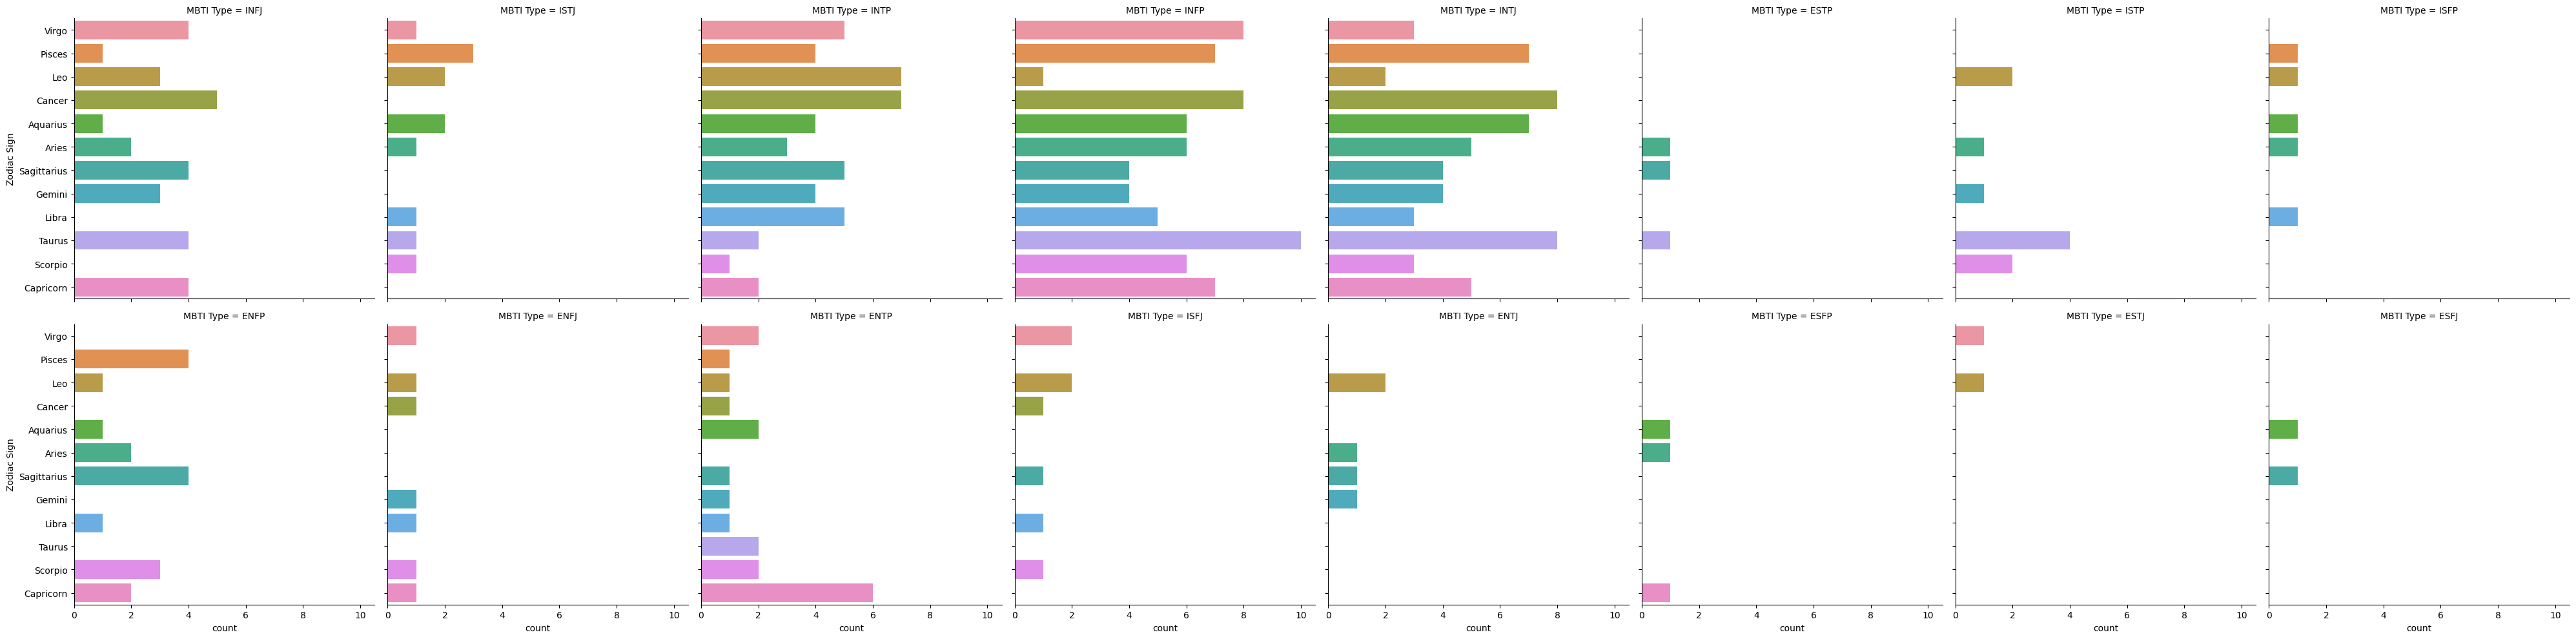

In [19]:
sns.catplot(y = 'Zodiac Sign', col = 'MBTI Type',
           data = data, kind = 'count',
           col_wrap = 8)

## Testing the correlation between MBTI type v.s Zodiac Sign

<Axes: xlabel='Zodiac Sign', ylabel='MBTI Type'>

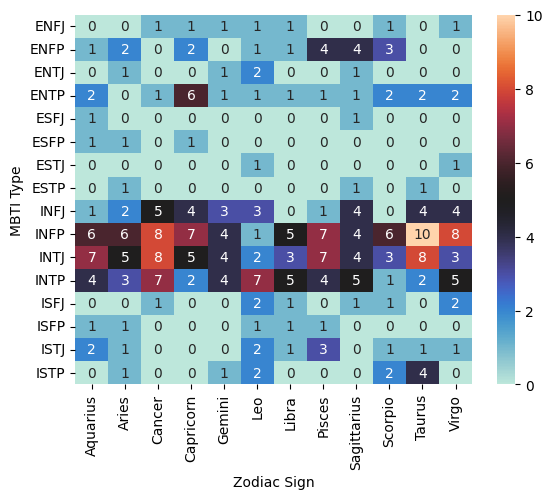

In [17]:
count_tb = pd.crosstab(data["MBTI Type"],data["Zodiac Sign"])
sns.heatmap(count_tb, center = 5, annot = True)

In [18]:
from IPython.display import display, Math

chi_test = stats.chi2_contingency(count_tb, correction = False)
display(Math(f'\\chi^2: {chi_test.statistic :.4f}'), Math(f'p-value: {chi_test.pvalue :.4f}'))

if chi_test.pvalue >= 0.05:
    print("The variables are not correlated with each other.")
else:
    print("The variables are correlated with each other.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables are not correlated with each other.


--------

# The four zodiac elements & MBTI Type

It can be found from the above correlation diagram that because the number of data in this data set is too small, there are many constellations and MBTI categories with a number of 0, which may lead to inaccurate test results.

The following further divides the zodiac signs into fire, earth, wind and water signs

- Fire signs: Aries, Leo, Sagittarius

- Earth signs: Taurus, Virgo, Capricorn

- Air signs: Gemini, Libra, Aquarius

- Water signs: Cancer, Scorpio, Pisces

In [21]:
def get_zodiac_element(astro_sign):
    if astro_sign in ['Cancer', 'Scorpio', 'Pisces']:
        element = 'Water'
    elif astro_sign in ['Aries', 'Leo', 'Sagittarius']:
        element = 'Fire'
    elif astro_sign in ['Taurus', 'Virgo', 'Capricorn']:
        element = 'Earth'
    elif astro_sign in ['Gemini', 'Libra', 'Aquarius']:
        element = 'Air'
    else:
        element = 'Unknown'
    return element

data['Zodiac Element'] = data['Zodiac Sign'].apply(get_zodiac_element)
data.head()

,Timestamp,Birthday,MBTI Type,Zodiac Sign,Zodiac category,Zodiac Element
0,2020-04-12 17:39:37,1996-09-13,INFJ,Virgo,9,Earth
1,2020-04-12 17:45:59,2000-03-08,ISTJ,Pisces,3,Water
2,2020-04-12 17:58:56,2000-08-20,INTP,Leo,8,Fire
3,2020-04-12 18:10:25,2000-06-30,INFP,Cancer,7,Water
4,2020-04-12 18:10:27,2000-06-30,INFP,Cancer,7,Water


## Distribution of four zodiac element

The proportions of different zodiac element who filled the form is shown below. We can see that the distribution is fairly balanced.

The majority of people who participated in the survey were earth element.

In [22]:
element_counts = data['Zodiac Element'].value_counts()
element_counts

Zodiac Element
Earth    87
Water    79
Fire     76
Air      64
Name: count, dtype: int64

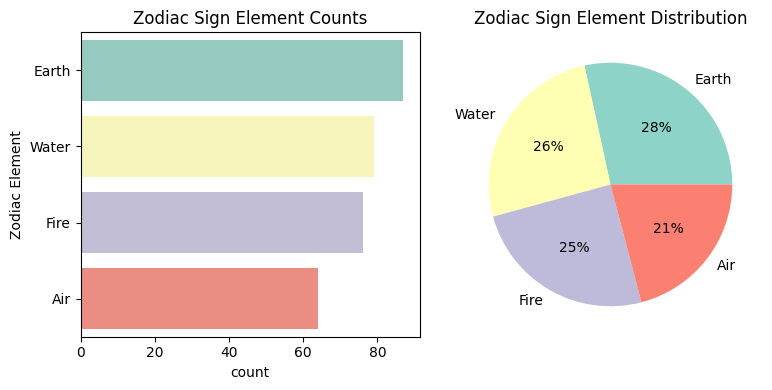

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(x=element_counts, y=element_counts.index, ax=axes[0], palette = 'Set3')
axes[0].set_title('Zodiac Sign Element Counts')

colors = sns.color_palette('Set3')[0:len(element_counts)]
axes[1].pie(element_counts, labels=element_counts.index, colors=colors, autopct='%.0f%%')
axes[1].set_title('Zodiac Sign Element Distribution')

plt.tight_layout()
plt.show()

### Counts of MBTI Type in each four zodiac elements

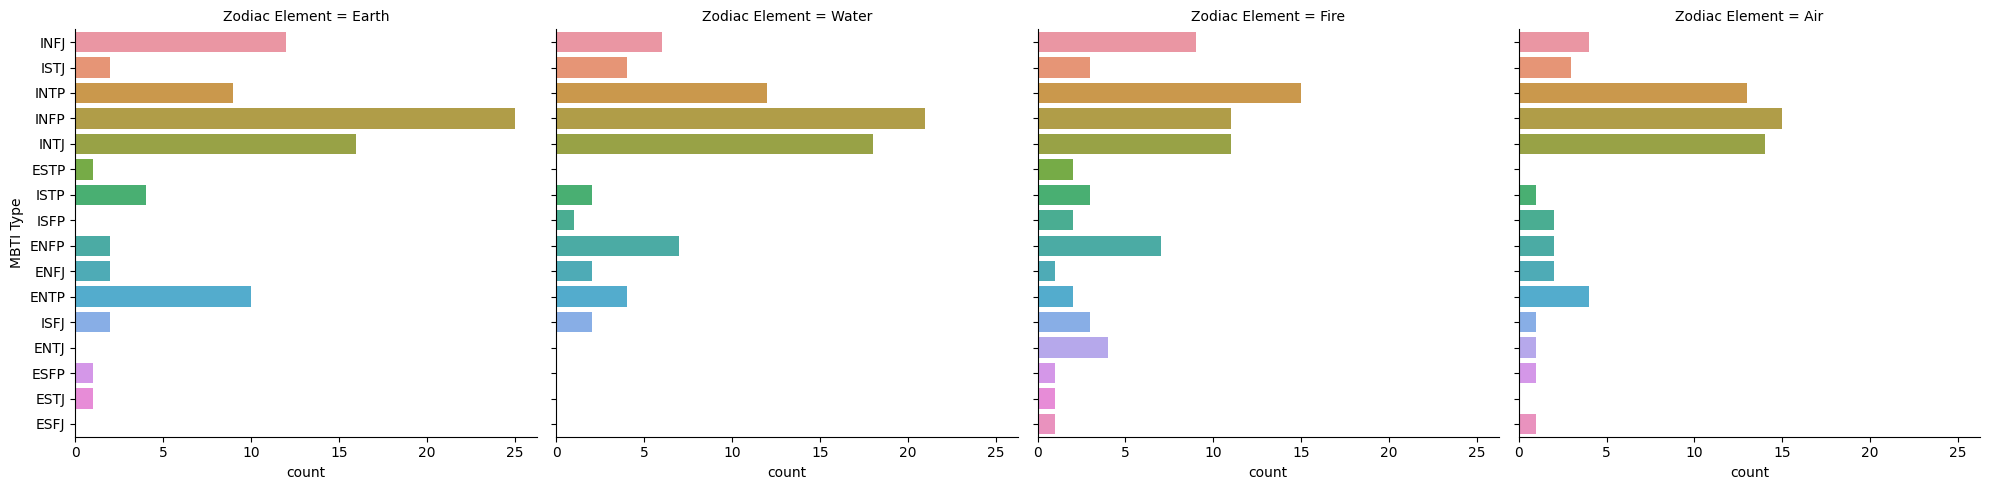

In [22]:
sns.catplot(y = 'MBTI Type', col = 'Zodiac Element',
           data = data, kind = 'count')

## Testing of four zodiac elements & MBTI Type

<Axes: xlabel='Zodiac Element', ylabel='MBTI Type'>

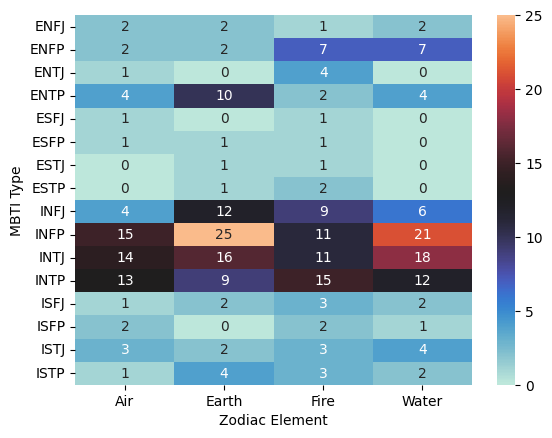

In [26]:
element_tb = pd.crosstab(data['MBTI Type'], data['Zodiac Element'])
sns.heatmap(element_tb, center = 13, annot = True)

In [24]:
chi_test = stats.chi2_contingency(element_tb, correction = False)
display(Math(f'\\chi^2: {chi_test.statistic :.4f}'), Math(f'p-value: {chi_test.pvalue :.4f}'))

if chi_test.pvalue >= 0.05:
    print("The variables are not correlated with each other.")
else:
    print("The variables are correlated with each other.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables are not correlated with each other.


We can see that there are still some zodiac categories with a *zero count* for certain MBTI types.

Therefore, let's use K-means clustering to perform dimensionality reduction on the MBTI data. K-means is an unsupervised learning clustering method. Which MBTI types will be grouped together? Let's find out!

--------

# The four zodiac elements & K-Means of MBTI Type

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
clusters = kmeans.fit_predict(element_tb)
element_tb['Cluster'] = clusters

for cluster in element_tb['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(element_tb[element_tb['Cluster'] == cluster].index.tolist())

element_tb

Cluster 0:
['ENFJ', 'ENFP', 'ENTJ', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
Cluster 2:
['ENTP', 'INFJ']
Cluster 3:
['INFP', 'INTJ']
Cluster 1:
['INTP']


Zodiac Element,Air,Earth,Fire,Water,Cluster
MBTI Type,,,,,
ENFJ,2,2,1,2,0
ENFP,2,2,7,7,0
ENTJ,1,0,4,0,0
ENTP,4,10,2,4,2
ESFJ,1,0,1,0,0
ESFP,1,1,1,0,0
ESTJ,0,1,1,0,0
ESTP,0,1,2,0,0
INFJ,4,12,9,6,2


According to K-means clustering,
- Group 1: **ENFJ**, **ENFP**, **ENTJ**, **ESFJ**, **ESFP**, **ESTJ**, **ESTP**, **ISFJ**, **ISFP**, **ISTJ**, **ISTP**
- Group 2: **ENTP**, **INFJ**
- Group 3: **INFP**, **INTJ**
- Group 4: **INTP**

In [30]:
def Cluster(MBTI):
    if MBTI in ['ENFJ', 'ENFP', 'ENTJ', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']:
        Class = 'k1'
    elif MBTI in ['ENTP', 'INFJ']:
        Class = 'k2'
    elif MBTI in ['INFP', 'INTJ']:
        Class = 'k3'
    elif MBTI in ['INTP']:
        Class = 'k4'
    else:
        Class = None
    return Class

data['Class'] = data['MBTI Type'].apply(Cluster)
data.head()

,Timestamp,Birthday,MBTI Type,Zodiac Sign,Zodiac category,Zodiac Element,Class
0,2020-04-12 17:39:37,1996-09-13,INFJ,Virgo,9,Earth,k2
1,2020-04-12 17:45:59,2000-03-08,ISTJ,Pisces,3,Water,k1
2,2020-04-12 17:58:56,2000-08-20,INTP,Leo,8,Fire,k4
3,2020-04-12 18:10:25,2000-06-30,INFP,Cancer,7,Water,k3
4,2020-04-12 18:10:27,2000-06-30,INFP,Cancer,7,Water,k3


## Distribution of four MBTI Cluster

The proportions of four MBTI Cluster who filled the form is shown below. 

It's interesting to note that the MBTI types that originally had the least count almost merged together to form the first group. Meanwhile, the INFJ type, which originally had the highest count, is grouped with ENTP, remaining one of the most frequent types within the four groups.

In [70]:
kmeans_counts = data['Class'].value_counts()
kmeans_counts

Class
k3    131
k1     75
k2     51
k4     49
Name: count, dtype: int64

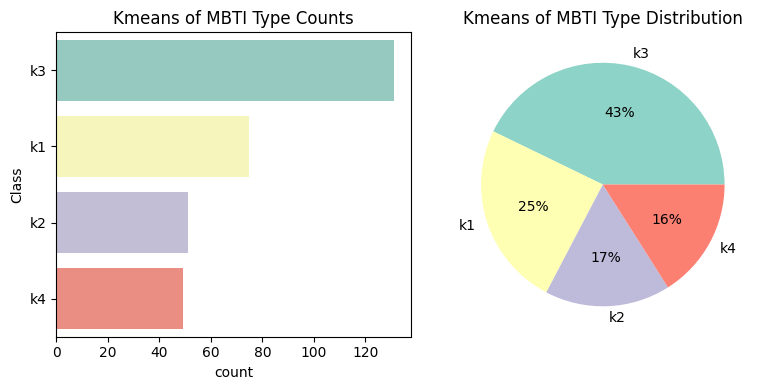

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4)
sns.barplot(x=kmeans_counts, y=kmeans_counts.index, ax=axes[0], palette = 'Set3')
axes[0].set_title('Kmeans of MBTI Type Counts')

colors = sns.color_palette('Set3')[0:len(kmeans_counts)]
axes[1].pie(kmeans_counts, labels=kmeans_counts.index, colors=colors, autopct='%.0f%%')
axes[1].set_title('Kmeans of MBTI Type Distribution')

plt.tight_layout()
plt.show()

In [44]:
result_df = pd.DataFrame(columns=['Air', 'Earth', 'Fire', 'Water'])

for i in range(4):
    cluster_sum = element_tb[element_tb['Cluster'] == i][['Air', 'Earth', 'Fire', 'Water']].sum()
    result_df = pd.concat([result_df, cluster_sum.to_frame().T], ignore_index=True)

result_df.index = [f'Cluster {i+1}' for i in range(4)]
result_df

,Air,Earth,Fire,Water
Cluster 1,14,15,28,18
Cluster 2,13,9,15,12
Cluster 3,8,22,11,10
Cluster 4,29,41,22,39


## Testing of four zodiac elements & Kmeans of MBTI Type

<Axes: >

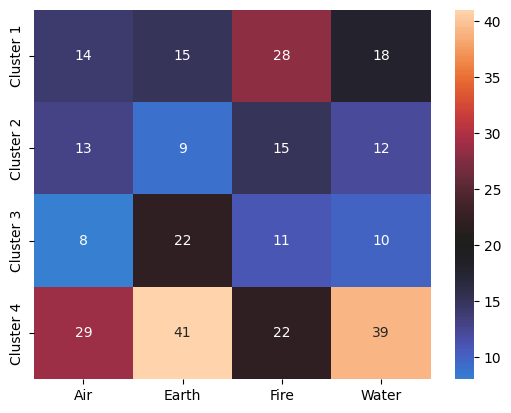

In [45]:
result_df = result_df.astype(float)
sns.heatmap(result_df, center = 20, annot = True)

In [46]:
chi_test = stats.chi2_contingency(result_df, correction = False)
display(Math(f'\\chi^2: {chi_test.statistic :.4f}'), Math(f'p-value: {chi_test.pvalue :.4f}'))

if chi_test.pvalue >= 0.05:
    print("The variables are not correlated with each other.")
else:
    print("The variables are correlated with each other.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables are correlated with each other.


However, it's worth noting that although K-means clustering resulted in a significant correlation between MBTI types and zodiac signs, the clustering method itself seems somewhat arbitrary. In other words, it's difficult to discern the reasons why certain types were grouped together after clustering. 

Therefore, I'd like to directly explore the relationship between the four major personality traits and zodiac signs!

-------

# Four personality traits v.s Zodiac sign

Next, I want to do a movie to explore whether the four major four personality traits of each zodiac sign are related.

1. Energy attitude
    - (Extraversion)Extroversion
    - (Introversion) introversion
    
  
2. Perception function
    - (Sensing) real feeling type
    - (Intuition) Intuition
    
    
3. Judgment function: thinking type
    - (Thinking) thinking type
    - (Feeling) Emotional type


4. attitude towards life
    - (Judging) Judging type
    - (Perceiving) Perceiving type

In [35]:
def EI(MBTI):
    for i in range(len(data)):
        if MBTI[0] == 'E':
            E_I = 'E'
        elif MBTI[0] == 'I':
            E_I = 'I'
        else:
            E_I = None
    return E_I

def SN(MBTI):
    for i in range(len(data)):
        if MBTI[1] == 'S':
            S_N = 'S'
        elif MBTI[1] == 'N':
            S_N = 'N'
        else:
            S_N = None
    return S_N

def TF(MBTI):
    for i in range(len(data)):
        if MBTI[2] == 'T':
            T_F = 'T'
        elif MBTI[2] == 'F':
            T_F = 'F'
        else:
            T_N = None
    return T_F

def JP(MBTI):
    for i in range(len(data)):
        if MBTI[3] == 'J':
            J_P = 'J'
        elif MBTI[3] == 'P':
            J_P = 'P'
        else:
            J_P = None
    return J_P

data['E/I'] = data['MBTI Type'].apply(EI)
data['S/N'] = data['MBTI Type'].apply(SN)
data['T/F'] = data['MBTI Type'].apply(TF)
data['J/P'] = data['MBTI Type'].apply(JP)

data.head()

,Timestamp,Birthday,MBTI Type,Zodiac Sign,Zodiac category,Zodiac Element,Class,E/I,S/N,T/F,J/P
0,2020-04-12 17:39:37,1996-09-13,INFJ,Virgo,9,Earth,k2,I,N,F,J
1,2020-04-12 17:45:59,2000-03-08,ISTJ,Pisces,3,Water,k1,I,S,T,J
2,2020-04-12 17:58:56,2000-08-20,INTP,Leo,8,Fire,k4,I,N,T,P
3,2020-04-12 18:10:25,2000-06-30,INFP,Cancer,7,Water,k3,I,N,F,P
4,2020-04-12 18:10:27,2000-06-30,INFP,Cancer,7,Water,k3,I,N,F,P


## Distribution of four personality traits

The proportions of four personality traits who filled the form is shown below.

First off, the **IN** group seems to take the cake when it comes to the percentage of births across each month. Now, this could be because the majority of respondents who filled the form fell into the **INTP** and **INFJ** categories. But, hey, it still stands - they're an intriguing bunch to follow.
It's evident from this dataset that the **I** and **N** preferences lead the majority of zodiac signs. However, in reality, the distribution of I/E personalities doesn't seem to differ too much, with a ratio close to 1:1.

However, the ratio of S/N preferences in this dataset closely mirrors reality.

In [37]:
EI_counts = data['E/I'].value_counts()
SN_counts = data['S/N'].value_counts()
TF_counts = data['T/F'].value_counts()
JP_counts = data['J/P'].value_counts()

print(EI_counts, '\n', SN_counts, '\n', TF_counts, '\n', JP_counts)

E/I
I    246
E     60
Name: count, dtype: int64 
 S/N
N    261
S     45
Name: count, dtype: int64 
 T/F
T    160
F    146
Name: count, dtype: int64 
 J/P
P    180
J    126
Name: count, dtype: int64


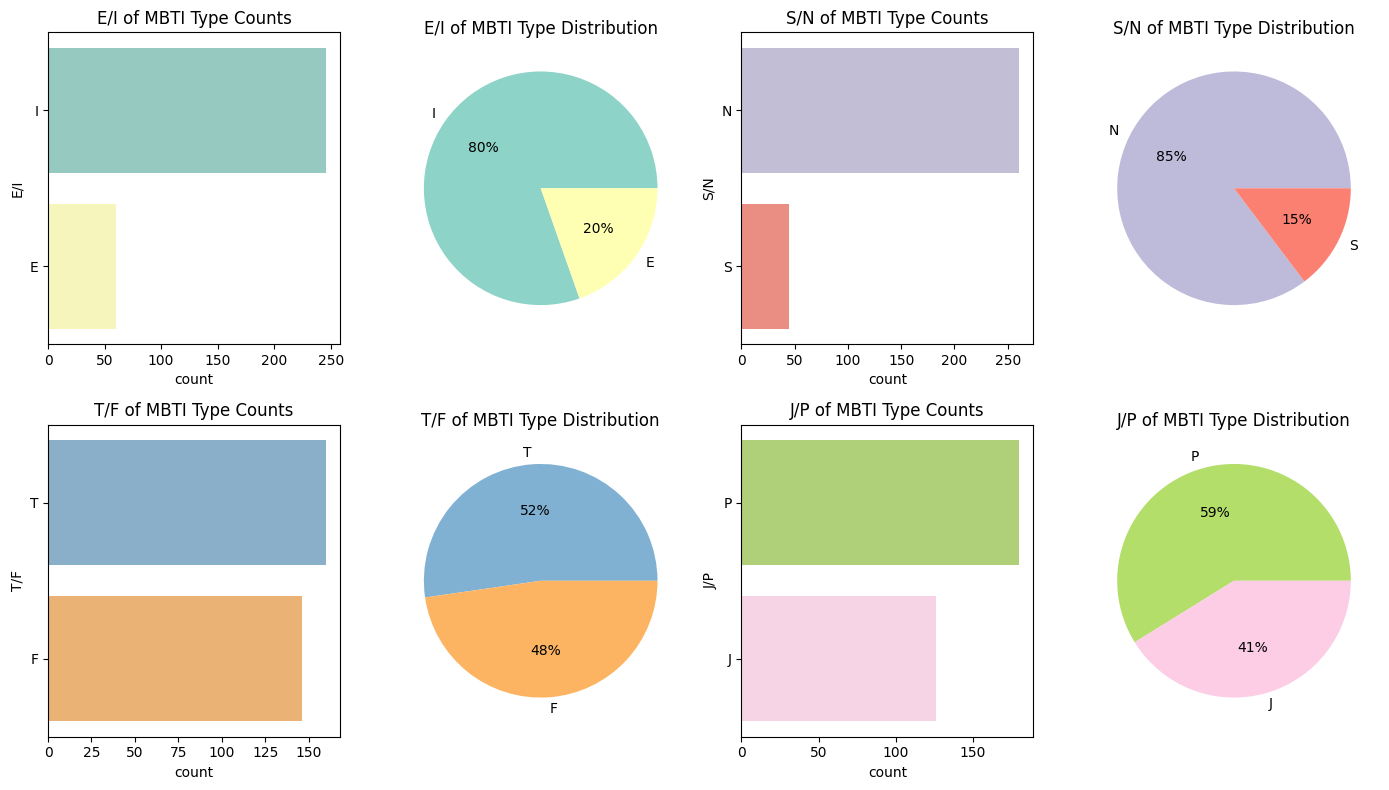

In [97]:
fig, axes = plt.subplots(2, 4, figsize=(14, 8))

# E/I
sns.barplot(x=EI_counts, y=EI_counts.index, ax=axes[0, 0], palette = 'Set3')
axes[0, 0].set_title('E/I of MBTI Type Counts')

colors = sns.color_palette('Set3')[0:len(kmeans_counts)]
axes[0, 1].pie(EI_counts, labels=EI_counts.index, colors=colors, autopct='%.0f%%')
axes[0, 1].set_title('E/I of MBTI Type Distribution')

# S/N
colors = sns.color_palette('Set3')[2:4]
sns.barplot(x=SN_counts, y=SN_counts.index, ax=axes[0, 2], palette = colors)
axes[0, 2].set_title('S/N of MBTI Type Counts')

axes[0, 3].pie(SN_counts, labels=SN_counts.index, colors=colors, autopct='%.0f%%')
axes[0, 3].set_title('S/N of MBTI Type Distribution')

# T/F
colors = sns.color_palette('Set3')[4:6]
sns.barplot(x=TF_counts, y=TF_counts.index, ax=axes[1, 0], palette = colors)
axes[1, 0].set_title('T/F of MBTI Type Counts')

axes[1, 1].pie(TF_counts, labels=TF_counts.index, colors=colors, autopct='%.0f%%')
axes[1, 1].set_title('T/F of MBTI Type Distribution')

# J/P
colors = sns.color_palette('Set3')[6:8]
sns.barplot(x=JP_counts, y=JP_counts.index, ax=axes[1, 2], palette = colors)
axes[1, 2].set_title('J/P of MBTI Type Counts')

axes[1, 3].pie(JP_counts, labels=JP_counts.index, colors=colors, autopct='%.0f%%')
axes[1, 3].set_title('J/P of MBTI Type Distribution')

plt.tight_layout()
plt.show()

### Calculate the proportions of the four major personality traits within each zodiac sign and represent them with a stacked bar chart

Although the **I** preference dominates in all zodiac signs, it's notable that the difference in proportions is less pronounced in Capricorn, Aquarius, and Sagittarius.

Interestingly, while the **S/N** ratio differs significantly overall, in Pisces and Scorpio, it's the **S** preference that seems to take the lead. Does this suggest that these two signs lean towards practicality (Let's keep it light-hearted and not take it too seriously)? 😂

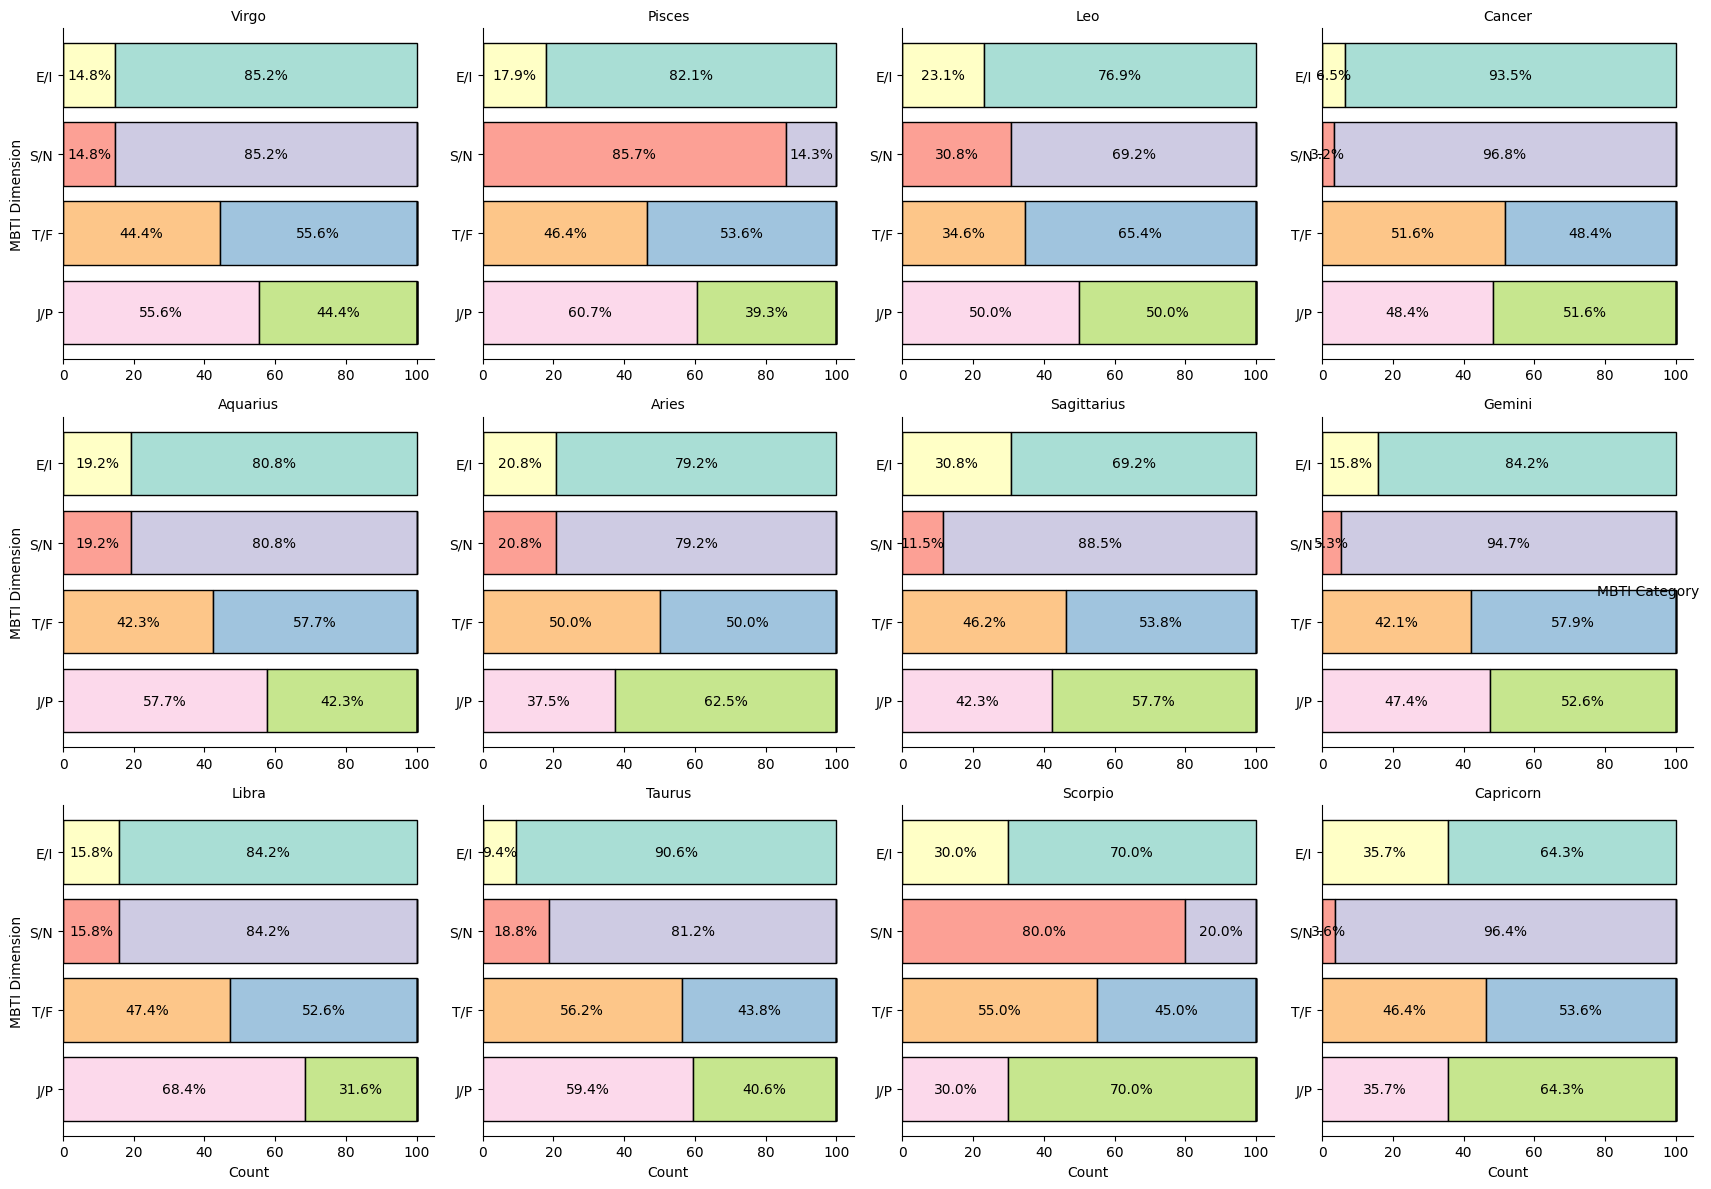

In [180]:
data_long = pd.melt(data, id_vars=['MBTI Type', 'Zodiac Sign'], value_vars=['E/I', 'S/N', 'T/F', 'J/P'],
                    var_name='MBTI Dimension', value_name='MBTI Category')

data_long['Count'] = 1
totals = data_long.groupby(['Zodiac Sign', 'MBTI Dimension'])['Count'].transform('sum')
data_long['Percentage'] = data_long['Count'] / totals * 100

# 创建 FacetGrid
g = sns.FacetGrid(data_long, col='Zodiac Sign', col_wrap=4, height=4, sharex=False, sharey=False)

def plot_with_percentages(data, **kwargs):
    ax = sns.histplot(data, y='MBTI Dimension', hue='MBTI Category', weights='Percentage', multiple='stack', palette='Set3', shrink=0.8, **kwargs)
    
    # 在每个堆叠柱状图上添加百分比标签
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()
        
        if width > 0:  # 只在非零条形上添加标签
            ax.text(x + width / 2, y + height / 2, f'{width:.1f}%', ha='center', va='center')

# 绘制堆叠柱状图，并在每个小图上调用 plot_with_percentages 函数
g.map_dataframe(plot_with_percentages)

# 调整图表布局
g.set_titles("{col_name}")
g.set_axis_labels("Count", "MBTI Dimension")
g.add_legend(title="MBTI Category")

# 显示图表
plt.tight_layout()
plt.show()

## Testing the correlation between Four personality traits & Zodiac sign

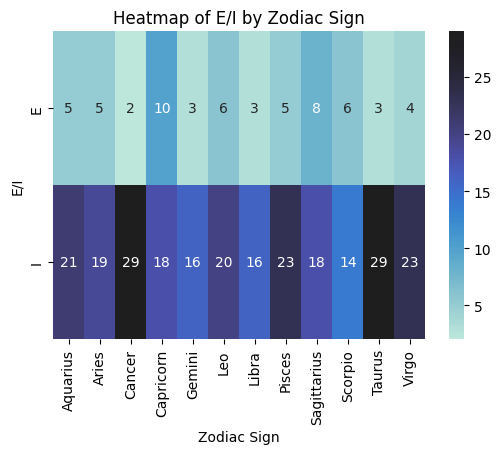

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables E/I and Zodiac Sign are not correlated with each other. 



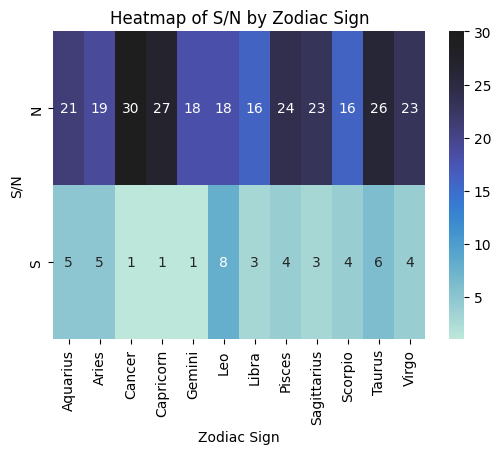

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables S/N and Zodiac Sign are not correlated with each other. 



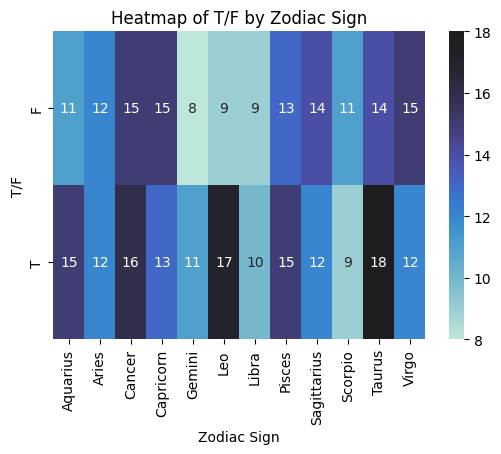

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables T/F and Zodiac Sign are not correlated with each other. 



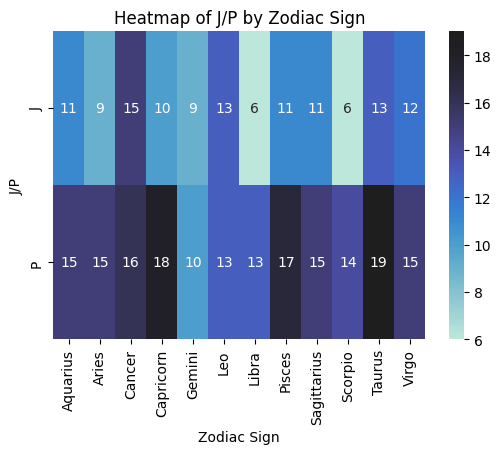

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The variables J/P and Zodiac Sign are not correlated with each other. 



In [168]:
for i, dimension in enumerate(['E/I', 'S/N', 'T/F', 'J/P']):
    plt.figure(figsize=(6, 4))
    df = pd.crosstab(data[dimension], data['Zodiac Sign'])
    sns.heatmap(df, center=df.max().max(), annot=True)
    plt.title(f'Heatmap of {dimension} by Zodiac Sign')
    plt.show()

    chi_test = stats.chi2_contingency(df, correction=False)
    display(Math(f'\\chi^2: {chi_test.statistic:.4f}'), Math(f'p-value: {chi_test.pvalue:.4f}'))

    if chi_test.pvalue >= 0.05:
        print(f"The variables {dimension} and Zodiac Sign are not correlated with each other. \n")
    else:
        print(f"The variables {dimension} and Zodiac Sign are correlated with each other. \n")

# Conclusion

There you have it, folks! We've taken a wild ride through the world of MBTI types and zodiac signs. We've seen how personality types are distributed across the months of the year, with certain types showing up more frequently in specific months. What's most intriguing is that no matter how we manipulate these variables, it doesn't seem to affect the lack of correlation between them. Could this mean that personality is minimally influenced by innate factors and more by external environments?

However, let's remember, this isn't an exact science. Our survey had a significant imbalance in categories, with a large number of INFPs and INTJs, which might have influenced the results. To truly understand the MBTI world, we need a broader mix of all personality types and more extensive data.

Nonetheless, we hope you've enjoyed this journey as much as we have. It's all about exploration and understanding, just like a good mixtape where each personality type adds its own unique flavor to the mix. Until next time, keep being yourself, because you make the world a more interesting place!